<a href="https://colab.research.google.com/github/FugaTakata/cst1_kadai01/blob/main/cst1_kadama_kawai.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [244]:
!pip install networkx

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [259]:
import json
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
from networkx.readwrite import json_graph

In [247]:
def calc_de(m, dists, pos):
  ex = 0
  ey = 0

  for i in pos:
    if i == m:
      continue
    xi, yi = pos[i]
    xm, ym = pos[m]
    norm = np.linalg.norm(np.array((xi, yi)) - np.array((xm, ym)))
    dim = dists[i][m]

    ex += (xm - xi) * (1 - dim / norm)
    ey += (ym - yi) * (1 - dim / norm)
  de = np.array([[ex], [ey]])

  return de

def calc_de2(m, dists, pos):
  exx = 0

  eyy = 0

  exy = 0

  for i in pos:
    if i == m:
      continue
    xi, yi = pos[i]
    xm, ym = pos[m]
    norm = np.linalg.norm(np.array((xi, yi)) - np.array((xm, ym)))
    dim = dists[i][m]

    exx += 1 - (dim * (yi - ym) ** 2) / norm ** 3
    eyy += 1 - (dim * (xi - xm) ** 2) / norm ** 3

    exy += dim * (((xi - xm) * (yi - ym)) / norm ** 3)

  de2 = np.array([[exx, exy], [exy, eyy]])
  return de2


In [253]:
def kamada_kawai(graph, pos, dists, eps):
  graph = nx.Graph()

  while True:
    max_id = None
    max_de =  None
    max_de_norm = None
    for node_id in pos:
      de = calc_de(node_id, dists, pos)
      if max_de is None or max_de_norm < np.linalg.norm(de):
        max_id = node_id
        max_de = de
        max_de_norm = np.linalg.norm(max_de)
    
    if max_de_norm < eps:
      break
    
    de2 = calc_de2(max_id, dists, pos)

    exx = de2[0][0]
    eyy = de2[1][1]
    exy = de2[0][1]

    ex = max_de[0][0]
    ey = max_de[1][0]

    dx = (eyy * ex - exy * ey) / (exy ** 2 - exx * eyy)
    dy = (exy * ex - exx * ey) / (exx * eyy - exy ** 2)

    pos[max_id][0] += dx
    pos[max_id][1] += dy
  
  return pos


In [260]:
dir = '/content/drive/MyDrive/cst1/graph/'
filename = 'dodecahedral.json'
graph = json_graph.node_link_graph(json.load(open(dir + filename)))

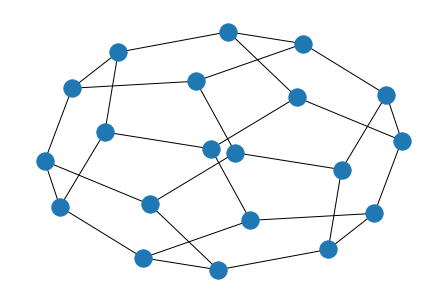

In [261]:
dists = dict(nx.all_pairs_shortest_path_length(graph))
initial_pos = nx.random_layout(graph)
nx.draw_kamada_kawai(graph)

32.51581788753546
31.12851600387047
32.059991430207056
32.28682628509879
29.704949641189483
28.96993480801036
28.824385579077205
28.45085444056715
27.80214379193543
25.38344667612603
24.616740064977996
28.62951885963264
22.55035146394474
251.75178718056077
19.96684374344269
19.231247031498043
201.76623748637283
19.303363667731492
160.52823051460655
19.331992484648787
17.27929991579116
17.49402083880381
15.501244596050146
14.646396023971358
21.806403084452846
13.015227404746147
11.511803665733462
21.58875970113123
12.918969394257076
10.910360653742277
8.706767208380333
8.76930410367222
8.807694151042064
97.9086966858157
8.643590907272884
7.192909554118122
17.005424586155957
6.846293878308852
7.817567751445527
7.598589735889207
752.5301845988746
12.085003751016705
21.170557522090473
8.201250256997676
8.160401221758624
26.503272311811056
8.001185762637302
6.764112486862435
6.414311500222543
7.481448910830707
33.663333392385944
7.026821979491824
86.56392432181202
6.974248201930937
6.425342

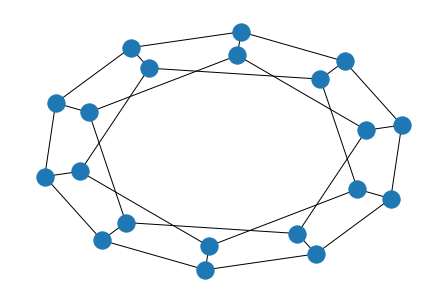

In [262]:
pos = kamada_kawai(graph, initial_pos, dists, 0.001)
nx.draw(graph, pos)
plt.show()
for i in pos:
  if pos[i][0] != initial_pos[i][0] or pos[i][1] != initial_pos[i][1]:
    print(pos[i], initial_pos[i])